In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import quantity_support

from fiasco import Element

quantity_support()


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x16b2de310>

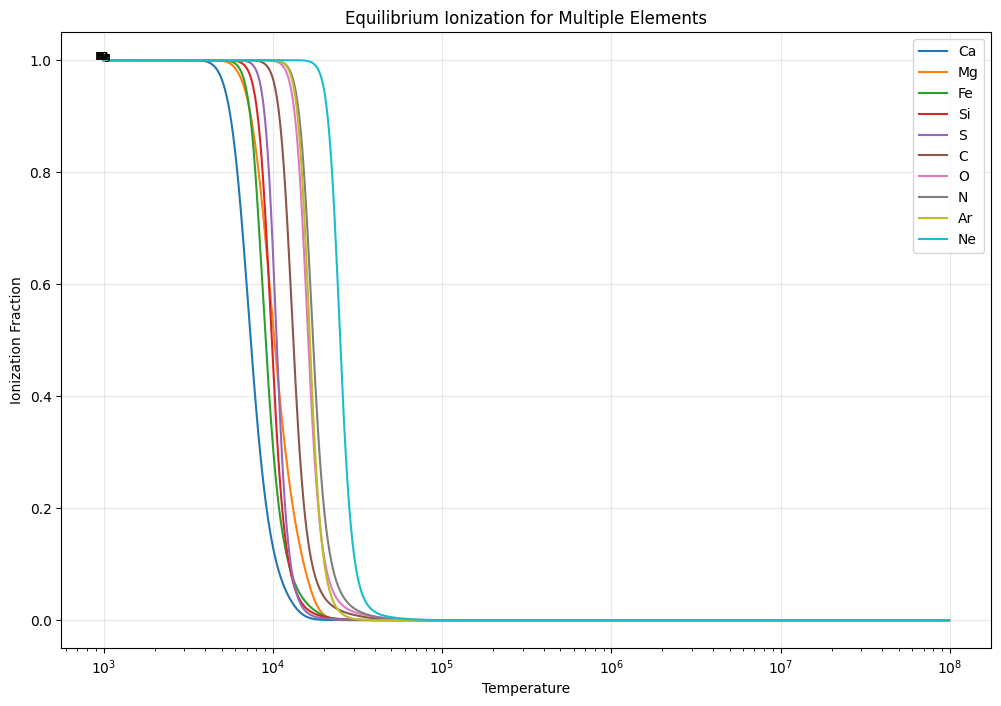

In [26]:
temperature = 10**np.arange(3, 8, 0.005) * u.K

# List of elements to plot
elements = ['Ca', 'Mg', 'Fe', 'Si', 'S', 'C', 'O', 'N', 'Ar', 'Ne']

# Create figure
plt.figure(figsize=(12, 8))

# Plot each element
for element_symbol in elements:
    el = Element(element_symbol, temperature)
    
    # Plot the first ionization state for each element
    ion = el[0]
    ionization_fraction = el.equilibrium_ionization[:, ion.charge_state]
    imax = np.argmax(ionization_fraction)
    
    plt.plot(el.temperature, ionization_fraction, label=element_symbol)
    plt.text(el.temperature[imax], ionization_fraction[imax], element_symbol,
             horizontalalignment='center', fontsize=8)

plt.xscale('log')
plt.xlabel('Temperature')
plt.ylabel('Ionization Fraction')
plt.title('Equilibrium Ionization for Multiple Elements')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()


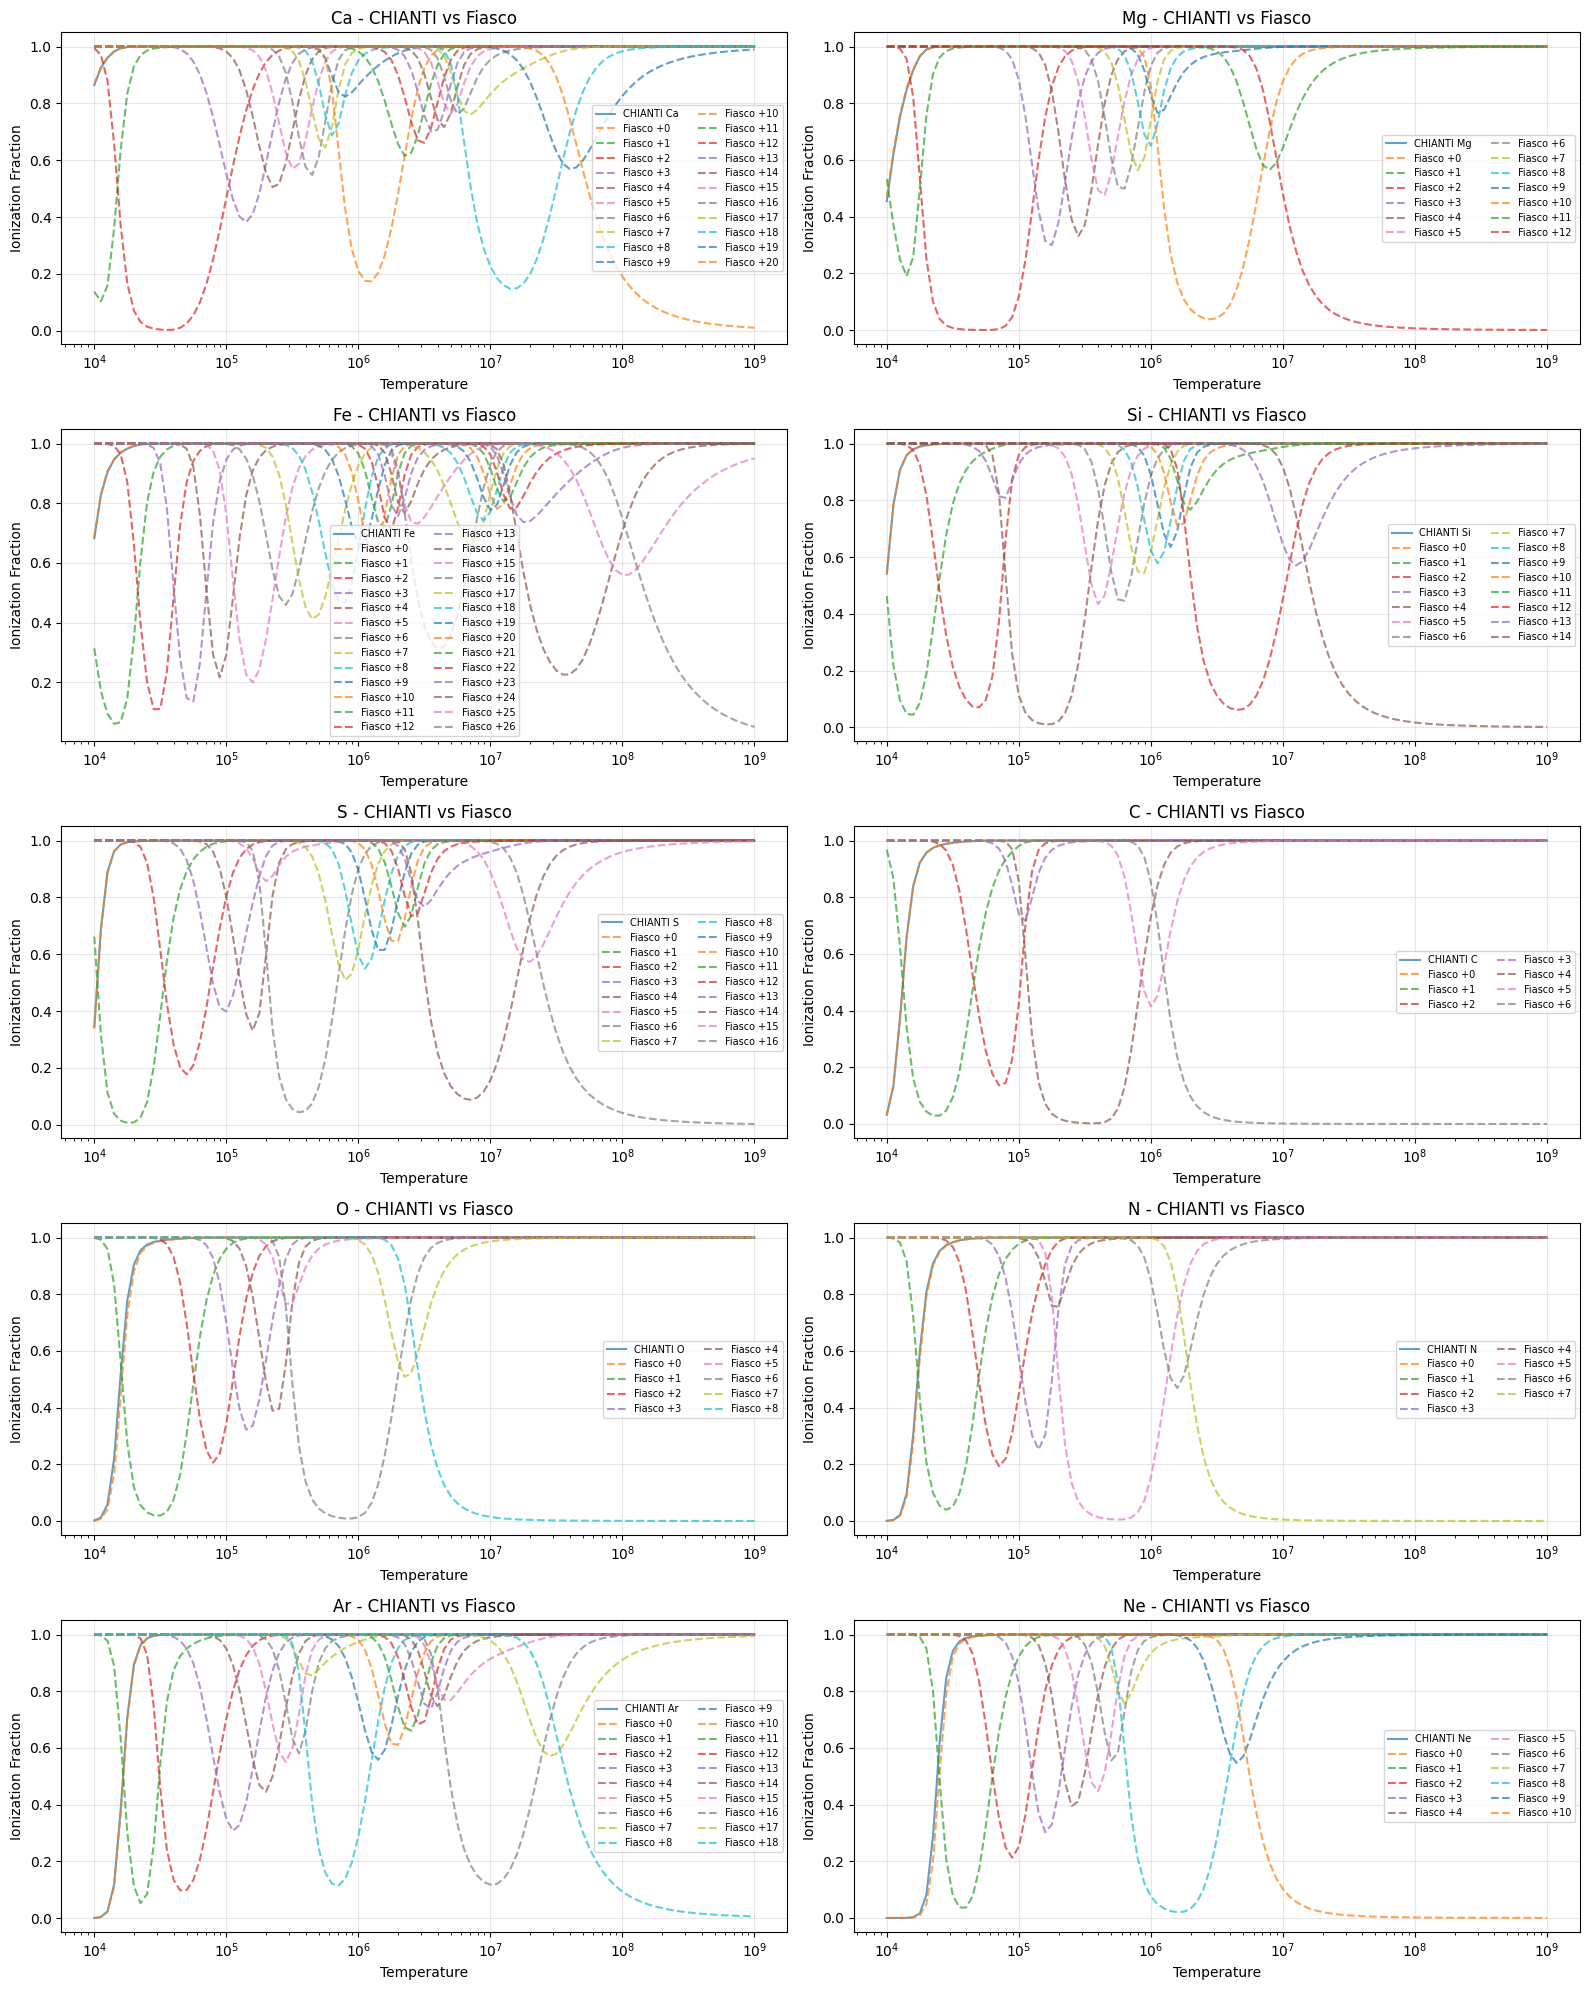

Comparison statistics:

Ca:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 21)

Mg:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 13)

Fe:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 27)

Si:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 15)

S:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 17)

C:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 7)

O:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 9)

N:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 8)

Ar:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 19)

Ne:
  CHIANTI data shape: (101,)
  Fiasco data shape: (101, 11)

Temperature range: 10000.0 K to 1000000000.0 K


In [29]:
# Load CHIANTI data from numpy file
chianti_data = np.load('chianti/ion_fraction_with_T.npz')
chianti_temps = chianti_data['temperature'] * u.K

# List of elements to compare
elements = ['Ca', 'Mg', 'Fe', 'Si', 'S', 'C', 'O', 'N', 'Ar', 'Ne']

# Create subplots for each element
n_elements = len(elements)
n_cols = 2
n_rows = (n_elements + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for idx, element_to_compare in enumerate(elements):
    ax = axes[idx]
    
    # Get CHIANTI data for this element
    chianti_fraction = chianti_data[f'{element_to_compare}_ioneq']
    
    # Get fiasco data for the same element
    el_fiasco = Element(element_to_compare, chianti_temps)
    
    # Plot CHIANTI data (from numpy file)
    if chianti_fraction.ndim == 1:
        # If 1D, just plot it directly
        ax.plot(chianti_temps, chianti_fraction, 
                label=f'CHIANTI {element_to_compare}', alpha=0.7, linestyle='-')
    else:
        # If 2D, plot each charge state
        for charge_state in range(chianti_fraction.shape[1]):
            ax.plot(chianti_temps, chianti_fraction[:, charge_state], 
                    label=f'CHIANTI +{charge_state}', alpha=0.7, linestyle='-')
    
    # Overlay Fiasco data
    for charge_state in range(el_fiasco.equilibrium_ionization.shape[1]):
        fiasco_fraction = 1-el_fiasco.equilibrium_ionization[:, charge_state]
        ax.plot(el_fiasco.temperature, fiasco_fraction,
                label=f'Fiasco +{charge_state}', alpha=0.7, linestyle='--')
        
        # Plot difference if shapes match
        if chianti_fraction.ndim == 2 and charge_state < chianti_fraction.shape[1]:
            difference = fiasco_fraction - chianti_fraction[:, charge_state]
            ax.plot(el_fiasco.temperature, difference,
                    label=f'Diff +{charge_state}', alpha=0.5, linestyle=':')

            print(difference)
    # ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Ionization Fraction')
    ax.set_title(f'{element_to_compare} - CHIANTI vs Fiasco')
    ax.legend(loc='best', ncol=2, fontsize=7)
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for idx in range(n_elements, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Print comparison statistics
print("Comparison statistics:")
for element_to_compare in elements:
    chianti_fraction = chianti_data[f'{element_to_compare}_ioneq']
    el_fiasco = Element(element_to_compare, chianti_temps)
    print(f"\n{element_to_compare}:")
    print(f"  CHIANTI data shape: {chianti_fraction.shape}")
    print(f"  Fiasco data shape: {el_fiasco.equilibrium_ionization.shape}")
print(f"\nTemperature range: {chianti_temps.min()} to {chianti_temps.max()}")


In [27]:
difference


NameError: name 'difference' is not defined

In [8]:
chianti_temps

array([1.00000000e+04, 1.12201845e+04, 1.25892541e+04, 1.41253754e+04,
       1.58489319e+04, 1.77827941e+04, 1.99526231e+04, 2.23872114e+04,
       2.51188643e+04, 2.81838293e+04, 3.16227766e+04, 3.54813389e+04,
       3.98107171e+04, 4.46683592e+04, 5.01187234e+04, 5.62341325e+04,
       6.30957344e+04, 7.07945784e+04, 7.94328235e+04, 8.91250938e+04,
       1.00000000e+05, 1.12201845e+05, 1.25892541e+05, 1.41253754e+05,
       1.58489319e+05, 1.77827941e+05, 1.99526231e+05, 2.23872114e+05,
       2.51188643e+05, 2.81838293e+05, 3.16227766e+05, 3.54813389e+05,
       3.98107171e+05, 4.46683592e+05, 5.01187234e+05, 5.62341325e+05,
       6.30957344e+05, 7.07945784e+05, 7.94328235e+05, 8.91250938e+05,
       1.00000000e+06, 1.12201845e+06, 1.25892541e+06, 1.41253754e+06,
       1.58489319e+06, 1.77827941e+06, 1.99526231e+06, 2.23872114e+06,
       2.51188643e+06, 2.81838293e+06, 3.16227766e+06, 3.54813389e+06,
       3.98107171e+06, 4.46683592e+06, 5.01187234e+06, 5.62341325e+06,
      